In [760]:
%matplotlib inline
from Constants import Constants
import mesa_reader as mr
import pandas
import numpy as np
import matplotlib.pyplot as plt
c=Constants()

###### Some plt choices ###########
plt.rcParams['figure.figsize'] = (8,6)
plt.rc_fonts = {'figure.figsize': (15, 9.3)}
plt.rcParams['font.family'] = ['Times New Roman']
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['legend.handlelength'] = 2
plt.rcParams["legend.framealpha"] = 1.0
plt.rcParams['axes.titlepad'] = 20 
plt.rc('legend', borderpad=0.2, markerscale=15., fancybox=False)
##########################################
#plt.rc('text', usetex=True) # For high-quality LaTeX (but very slow)

# Define some useful functions
def find_zams(logl,loglh,model):
    zams=0
    while (loglh[zams] < 0.99*logl[zams]):
     zams=zams+1
    return zams;

def find_hezams(logl,loglhe,model):
    zams=0
    while (loglhe[zams] < 0.90*logl[zams]):
     zams=zams+1
    return zams;

def find_teff(teff,model,val):
    ii=0
    while (teff[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;

def find_h1(h1,model,val):
    ii=0
    while (h1[ii] > val) and (ii+1 < len(model)):
     ii=ii+1
    return ii;
def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

Constants defined...


In [761]:
# Define some colors
BLACK      = (0.00,0.00,0.00)
ORANGE     = (0.90,0.60,0.00)
SKY_BLUE   = (0.35,0.70,0.90)
BLUE_GREEN = (0.00,0.60,0.50)
YELLOW     = (0.95,0.90,0.25)
BLUE       = (0.00,0.45,0.70)
VERMILLION = (0.80,0.40,0.00)
RED_PURPLE = (0.80,0.60,0.70)
COLORS=[ORANGE,BLUE_GREEN,SKY_BLUE,RED_PURPLE,VERMILLION,YELLOW,BLUE,BLACK]

# Set some global plot options
#plt.rcParams['figure.figsize'] = (6,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['legend.borderpad'] = 0.5
plt.rcParams['legend.labelspacing'] = 0.5
plt.rcParams['legend.handletextpad'] = 0.5
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 16

Rsun= 6.9598e10
secyer=3600*24*365
Lsun = 3.839e33
secyer = 3600*24*365
Msun = 1.989e33

In [762]:
#planets plotted
K2137b=0.00482
Trappist1b=0.01151
HATS67b=0.03
K239b=0.057

def const_radius_on_hrd(T,R):
    return 4*np.pi*R**2*c.sigmaSB*T**4

def ConstRadius():
    # Add Constant radius lines:
    teff=np.arange(1000,30000,1)
    y1= np.log10(const_radius_on_hrd(teff,0.1*c.au)/c.lsun)
    y2= np.log10(const_radius_on_hrd(teff,0.01*c.au)/c.lsun)
    plt.plot(np.log10(teff),y1,linestyle='--',linewidth=1,color='grey', alpha=0.4)
    plt.plot(np.log10(teff),y2,linestyle='--',linewidth=1,color='grey', alpha=0.4)
    plt.fill_between(np.log10(teff), y1 , y2 ,facecolor='grey', alpha=0.05)
    #plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,K2137b*c.au)/c.lsun),linestyle='-',linewidth=2, alpha=0.3,\
    #         label= ' K2137 b, 0.004 AU')
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,Trappist1b*c.au)/c.lsun),linestyle='-',linewidth=3, alpha=0.5,\
             label= ' Trappist-1 b, 0.01 AU', c = RED_PURPLE)
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,HATS67b*c.au)/c.lsun),linestyle='-',linewidth=3, alpha=0.5,\
             label= ' HATS-67 b, 0.03 AU', c = BLUE_GREEN)
    plt.plot(np.log10(teff),np.log10(const_radius_on_hrd(teff,K239b*c.au)/c.lsun),linestyle='-',linewidth=3, alpha=0.5,\
             label= ' K239 b, 0.06 AU', c = SKY_BLUE)
    legend = plt.legend(loc='lower left', markerscale=15, fancybox=True, prop={'size': 17}) #borderpad=0.2
    #change x in 0.01 increments
    #change y in 0.02 increments    
    

In [763]:
def orbital_energy(m1,m2,a):
    cgrav = 6.6743e-8
    return -cgrav*m1*m2/(2.0*a)
    

In [764]:
DATA='./test_highmass/'

From read_log_data  5
From read_log_data header: ['r21.12.1', 'gfortran', '10.2.0', 'x86_64-macos-21.11.1', 'CRMATH', '20230109', 50.0, 1000.0, 1.9884098706980504e+33, 69570000000.0, 3.828e+33]


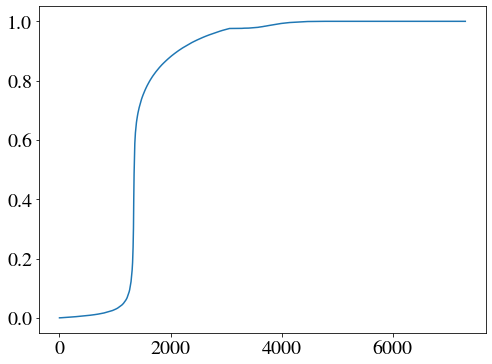

In [765]:

h=mr.MesaData(DATA+'/LOGS/history.data')


eng_f=h.Engulfed_fraction
dest_f=10**h.Log_Destruction_factor
planet_location=h.Orbital_separation
star_radius=10**h.log_R
model= h.model_number
age=h.star_age
logdt=h.log_dt
logl=h.log_L
logt=h.log_Teff
enclosed_mass = h.Enclosed_mass

tidal = np.where(eng_f == 0)
grazing = np.where((0 < eng_f) & (eng_f < 0.999))
plungein= np.where((eng_f == 1) & (dest_f < 1))
relaxation = np.where((eng_f == 1) & (dest_f > 1))


sel = np.concatenate((grazing,plungein), axis=None)

#sel = np.where(np.in1d(grazing,plungein))
plt.plot(model,eng_f)

1.2759310330479626e+45


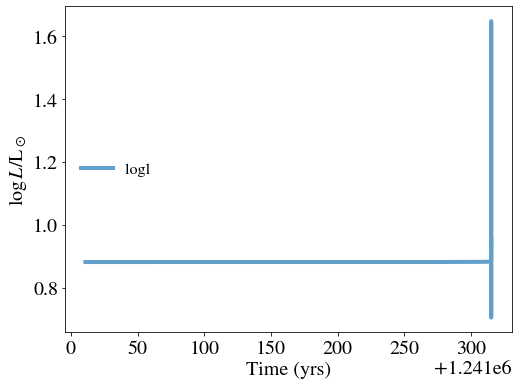

In [766]:

mdot=h.log_abs_mdot
infall=10**h.Log_Infall_distance
injected_e=(h.Log_Injected_energy)
v_orb=h.Orbital_velocity
dest_f=10**h.Log_Destruction_factor
eng_f=h.Engulfed_fraction
mass_heated=h.Total_mass_affected
planet_location=h.Orbital_separation
logdt=h.log_dt
star_radius=10**h.log_R
t0=0
dl = 10**injected_e/((10**logdt)*secyer)

#injected_e=10**(h.Log_Injected_energy)

#plt.plot(np.log10(age),planet_location,linewidth=4,alpha=0.7,label=' Orbital Separation')
#plt.plot(np.log10(age),star_radius,linewidth=4,alpha=0.7,label=' Stellar Radius')
plt.plot(age[sel],logl[sel],linewidth=4,alpha=0.7,label=' logl')

#plt.plot(age[sel],np.log10(dl[sel]/lsun),linewidth=4,alpha=0.7,label=' Dl')
#plt.plot(age,np.log10(v_orb))
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.legend(handlelength=2,frameon=False,loc="center left",fontsize=16)
#plt.axis([.542696e6,0.542698e6, -1 , 8])
plt.xlabel(r'Time (yrs)')
plt.ylabel(r'$\log\, L / {\rm L}_\odot$')
#plt.axis([age,dl, 0,7])

print(sum(10**injected_e))


In [767]:
m1 =1*Msun
m2 =0.01*Msun
m_r = h.Enclosed_mass
a_max = np.max(planet_location[sel])
a_min = np.min(planet_location[sel])

print(a_max, a_min, a_max-a_min)
E_amax = orbital_energy(m1,m2,a_max*Rsun)
m1_a = m_r[sel[-1]]
E_amin = orbital_energy(m_r[sel][-1],m2,a_min*Rsun)
print(m_r[sel][-1]/Msun,E_amax,E_amin)
#print(help(m_r[sel][-1]))

4.171699885278458 3.3313703447293266 0.8403295405491313
0.9753499836260642 -4.547110174288525e+45 -5.5537471085844485e+45


In [768]:
DeltaE = np.abs(E_amin-E_amax)
print(E_amin,E_amax,DeltaE)
print(np.sum(10**injected_e[sel]))
#print(np.sum(10**injected_e))
#print(max(h.Total_energy_injected[sel]))
print(np.sum(10**injected_e[sel])/DeltaE)

-5.5537471085844485e+45 -4.547110174288525e+45 1.0066369342959236e+45
1.1377160725591092e+45
1.1302149104581254


In [769]:
dr=10**h.Log_Infall_distance
dr_tides =10**h.Log_Infall_distance_tides
delta_r = np.sum(dr[sel])/Rsun
delta_r_tides = np.sum(dr_tides[sel])/Rsun
print(delta_r+delta_r_tides)
print((delta_r+delta_r_tides)/(a_max-a_min))

0.838140485500174
0.9973950040509978


1.00641148967432e+45


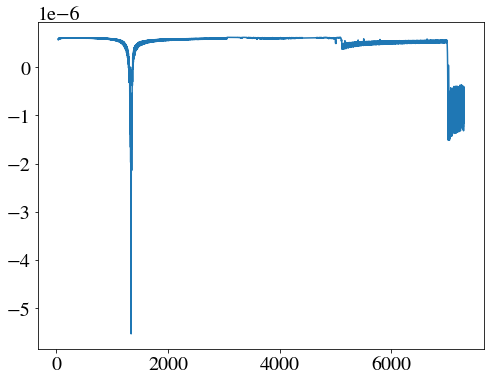

In [770]:
E_orb = h.E_orbit
mr    = h.Enclosed_mass
SumE  = h.Total_energy_injected
de    = 10**h.Log_Injected_energy
a     = h.Orbital_separation

#plt.plot(a,np.log10(-E_orb))
#plt.plot(a,np.log10(c.G*m2*mr/(2*a*Rsun)))
e1 = np.log10(-E_orb)
e2 = np.log10(c.G*m2*mr/(2*a*Rsun))
plt.plot(h.model_number[sel],np.log10(e1[sel]/e2[sel]))
print(E_orb[sel][0]-E_orb[sel][-1])

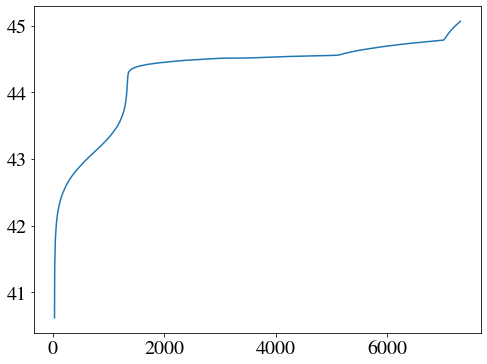

In [771]:
plt.plot(h.model_number[sel],np.log10(SumE[sel]))

7.82294288941064e+44
304.26329758390784
2.9758213099731603e+37


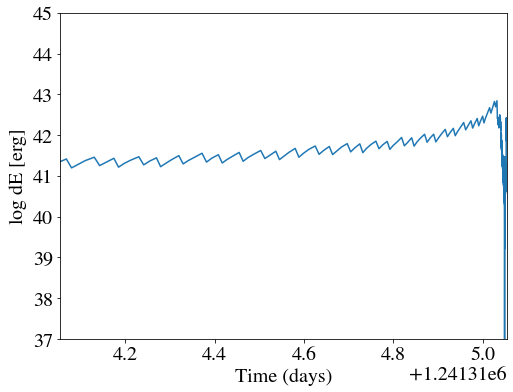

In [759]:
plt.plot(age,injected_e)
#plt.plot(age,star_radius)
#plt.axis([655.4*365,656.1*365, 1,2.1])
#plt.axis([235753.5,235826.5, 1,2.1])
plt.axis([age[sel][-1]-1,age[sel][-1], 37,45])
plt.xlabel(r'Time (days)')
plt.ylabel(r'$\log  $ dE [erg]')
dt=10**logdt
print(sum(10**injected_e[sel]))
print(age[sel][-1]-age[sel][0]) 
E = sum(10**injected_e[sel])
t = (age[sel][-1]-age[sel][0])*24*3600

# Average luminosity: 
print(E/t)



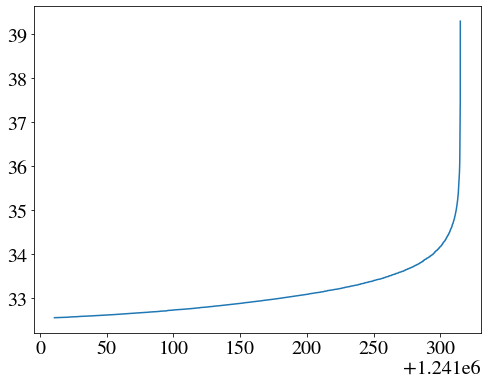

In [706]:

# Injected Luminosity / Stellar Luminosity

dl = 10**injected_e/((10**logdt)*secyer)
plt.plot(age[sel] ,np.log10(dl[sel]))
#plt.axis([age[sel][-1]-1,age[sel][-1], 30,45])
#print(dl[sel])

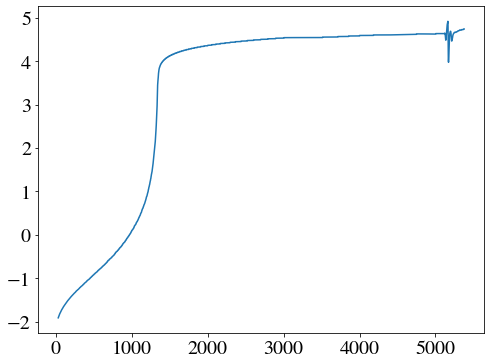

In [707]:
# Injected Luminosity / Stellar Luminosity
dl = 10**injected_e/((10**logdt)*secyer)
lstar=(10**h.log_L)*Lsun 
plt.plot(h.model_number[sel] ,np.log10(dl[sel]/lstar[sel]))

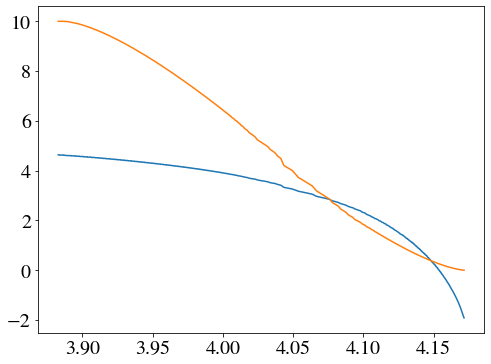

In [692]:
# Injected Luminosity / Stellar Luminosity as function of injection depth
dl = 10**injected_e/((10**logdt)*secyer)
lstar=(10**h.log_L)*Lsun 
plt.plot(h.Orbital_separation[sel] ,np.log10(dl[sel]/lstar[sel]))
plt.plot(h.Orbital_separation[sel] ,h.Engulfed_fraction[sel]*10)

In [669]:
print(max(dest_f))

0.00036601700483221563


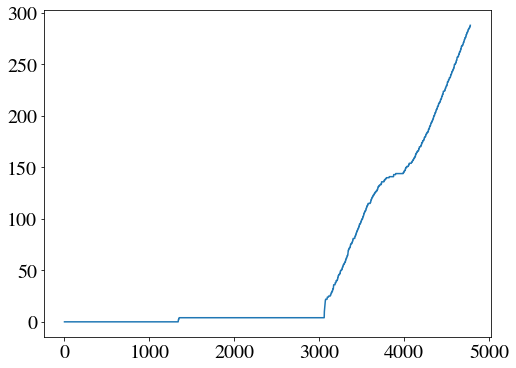

In [670]:
plt.plot(h.model_number ,h.num_retries)

In [671]:
h.bulk_names

('model_number',
 'num_zones',
 'star_age',
 'star_age_sec',
 'star_age_min',
 'star_age_hr',
 'star_age_day',
 'log_dt',
 'star_mass',
 'log_xmstar',
 'log_abs_mdot',
 'mass_conv_core',
 'conv_mx1_top',
 'conv_mx1_bot',
 'conv_mx2_top',
 'conv_mx2_bot',
 'mx1_top',
 'mx1_bot',
 'mx2_top',
 'mx2_bot',
 'mix_type_1',
 'mix_qtop_1',
 'mix_type_2',
 'mix_qtop_2',
 'mix_type_3',
 'mix_qtop_3',
 'mix_type_4',
 'mix_qtop_4',
 'mix_type_5',
 'mix_qtop_5',
 'mix_type_6',
 'mix_qtop_6',
 'mix_type_7',
 'mix_qtop_7',
 'mix_type_8',
 'mix_qtop_8',
 'mix_type_9',
 'mix_qtop_9',
 'mix_type_10',
 'mix_qtop_10',
 'mix_relr_type_1',
 'mix_relr_top_1',
 'mix_relr_type_2',
 'mix_relr_top_2',
 'mix_relr_type_3',
 'mix_relr_top_3',
 'mix_relr_type_4',
 'mix_relr_top_4',
 'mix_relr_type_5',
 'mix_relr_top_5',
 'mix_relr_type_6',
 'mix_relr_top_6',
 'mix_relr_type_7',
 'mix_relr_top_7',
 'mix_relr_type_8',
 'mix_relr_top_8',
 'mix_relr_type_9',
 'mix_relr_top_9',
 'mix_relr_type_10',
 'mix_relr_top_10',
 'l